# Prosper Loan Data Exploration

## by Adewale Isaac

## Table of Contents
> The table of content is going to follow the framework **Question-Visualization-Observations** throughout the data exploration.
<ul>
<li><a href="#Introduction">Introduction</a></li> 
<li><a href="#PreliminaryWrangling">Preliminary Wrangling</a></li>   
<li><a href="#Question1">Question 1</a></li>
    <ul>
      <li><a href="#Question01">Question</a></li>
      <li><a href="#Visualization01">Visualization</a></li>
      <li><a href="#Observations01">Observations</a></li>
    </ul>
<li><a href="#Question2">Question 2</a></li>
    <ul>
      <li><a href="#Question02">Question</a></li>
      <li><a href="#Visualization02">Visualization</a></li>
      <li><a href="#Observations02">Observations</a></li>
    </ul>
<li><a href="#Question3">Question 3</a></li>
    <ul>
      <li><a href="#Question03">Question</a></li>
      <li><a href="#Visualization03">Visualization</a></li>
      <li><a href="#Observations03">Observations</a></li>
    </ul>
<li><a href="#Question4">Question 4</a></li>
    <ul>
      <li><a href="#Question04">Question</a></li>
      <li><a href="#Visualization04">Visualization</a></li>
      <li><a href="#Observations04">Observations</a></li>
    </ul>
<li><a href="#Question5">Question 5</a></li>
    <ul>
      <li><a href="#Question05">Question</a></li>
      <li><a href="#Visualization05">Visualization</a></li>
      <li><a href="#Observations05">Observations</a></li>
    </ul>
  

<a id='Introduction'></a>
## Introduction
> This dataset expressses the various attributes of 113,937 customers of a Prosper bank from 2005 to 2014.
The columns display different attributes that can be used to describe customers that collected loans from Prosper bank over the period. The brief description of the columns of the dataset can be found in [Prosper Variable definition.](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) With these datasets, key decisions can be made with regards to loan types, volumes, customer types, period of frequent loan defaults, e.t.c.

> Based on the following, we seek to ask the following questions from the data and use data visualization plots to answer them:

        1. What period (quarter) of the year do customers who default on loans apply for loans most?

        2. Does a high credit ratings of a customer also mean he has a high level of trust among his friends and investors?

        3. What are the attributes of customers that perform excellently with regards to loan repayment? 
        
        4. Do customers with a high debt to income ratio have a high loan default amount on loans?
        
        5. What is the trend of loans amount given by Prosper bank over the years?
           
   

<a id='PreliminaryWrangling'></a>
## Preliminary Wrangling

This document explores a dataset containing laons and attributes for approximately 113,937 dataset of customers for Prosper Loan Data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe
prosper_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape, composition, statistics and attributes
print(prosper_df.shape)
print(prosper_df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
#prinitng the first 5 rows of the dataset
print(prosper_df.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18   

In [5]:
#Determining the information about the columns of the dataset
print(prosper_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
#There was no duplication of items in the dataset for Prosper bank
prosper_df.duplicated().sum()

0

### What is the structure of your dataset?

> The dataset consists data of various types which includes integers, floats, booleans, categorical and objects

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest includes: 'LoanStatus', 'CreditGrade', 'ListingKey', 'LoanOriginationDate'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features of interest includes: 'LoanStatus', 'CreditGrade', 'ListingKey', 'LoanOriginationDate', 'LoanOriginationQuarter', 'LoanOriginalAmount'

<a id='Question1'></a>
## Question 1

<a id='Question01'></a>
### Question
#### What period (quarter) of the year do customers, who default on loans, apply for loans most?

>To answer this question, the dataset is filtered with regards to only loan defaulters in Prosper bank

>Then, we begin to explore the data using univariate, bivariate and multivariate exploration of the data.

>Finally, we explain what we observed with the explored data.

In [7]:
# Filtering the dataset to get the defaulters column of Prosper bank
new_defaulters = []
for col in prosper_df['LoanStatus']:
    if 'Past Due' in col:
        new_defaulters.append(col[:8].replace(" ", ""))#include the first 8 characters which is 'Past Due' and 
        #remove the space in between it
    else:
        new_defaulters.append(col)

#adding the new column to the data frame
prosper_df['new_defaulters'] = new_defaulters
filter_list = ['Defaulted','PastDue','Chargedoff']
prosper_defaulters_df = prosper_df.loc[prosper_df['new_defaulters'].isin(filter_list)]

"""To get the total number of loan defaulters at Prosper bank as 19077 customer out of 113937, i.e about 16.74% of customer
default on loans. This is quite high as it should be within single digits (0 - 9 percent)
"""
prosper_defaulters_df.shape

(19077, 82)

<a id='Visualization01'></a>
## Visualization

## Univariate Exploration


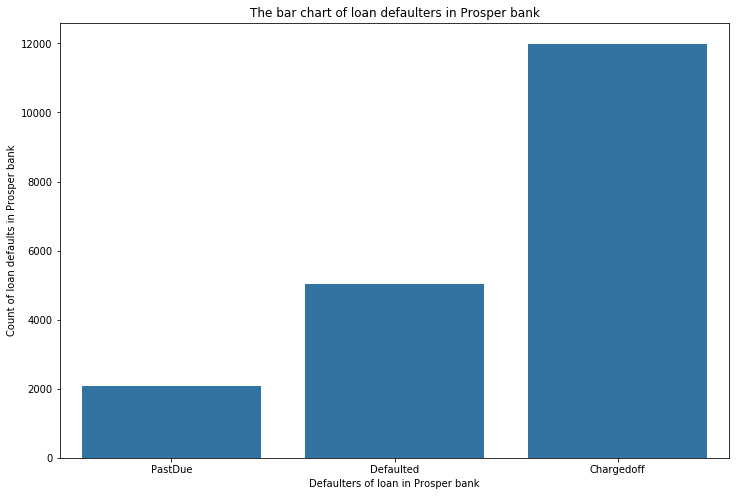

In [8]:
# univariate plot of the LoanStatus
def bar_chart_plot(univariate_arg, df, xlabel, ylabel, title):
    plt.figure(figsize=[12, 8])
    base_color = sb.color_palette()[0]
    type_count = df[univariate_arg].value_counts()
    sb.countplot(data=df, x=univariate_arg, color=base_color);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    plt.legend()
bar_chart_plot('new_defaulters', prosper_defaulters_df, 'Defaulters of loan in Prosper bank', 
               'Count of loan defaults in Prosper bank', 'The bar chart of loan defaulters in Prosper bank' )


>**Conclusion**: The customers who defaulted most in loans are those ChargedOff customers. ChargedOff means the lender or creditor has written the account off as a loss, and the account is closed to future charges. It may be sold to a debt buyer or transferred to a collection agency. It is not surprising to see that this consists of most loans of the bank as it is an accumulation of defaulters (both from PastDue and Defaulted) who fail to repay over time and their debt is charged-off.

## Bivariate Exploration


In [9]:
#Filtering the quarter period of the
# quarterly = []
# for col in prosper_defaulters_df['LoanOriginationQuarter']:
#     if 'Q' in col:
#         quarterly.append(col[:2])#include the first 8 characters which is 'Past Due' and 
#         #remove the space in between it
#     else:
#         quarterly.append(col)

# prosper_defaulters_df['quarterly'] = quarterly
#Or
prosper_defaulters_df['quarterly'] = prosper_defaulters_df['LoanOriginationQuarter'].apply(lambda x:x.split()[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


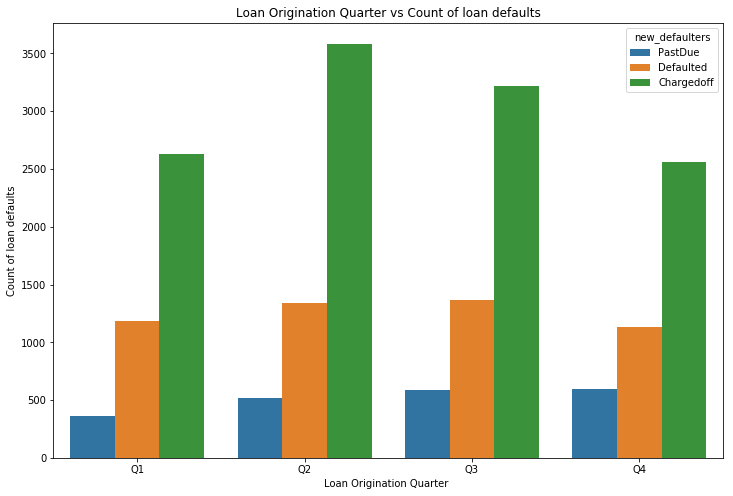

In [10]:
#Ploting the clustered bar chart to show relationship between the two categorical variables
def clustbar(data, x, hue, title, ylabel, xlabel):
    plt.figure(figsize=[12, 8]);
    g = sb.countplot(data = data, x = x, hue = hue);
    # add label to the axis and label to the plot
    g.set(title = title, ylabel = ylabel, xlabel = xlabel);

clustbar(prosper_defaulters_df, 'quarterly', 'new_defaulters', "Loan Origination Quarter vs Count of loan defaults", 
        "Count of loan defaults", 'Loan Origination Quarter ')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the customers that defaulted the most started their loans in the third and fourth quarters of the year. Can this be a point of caution for Prosper bank when they considering the period of customers that take loan. This is a cause for further investigation.


## Multivariate Exploration


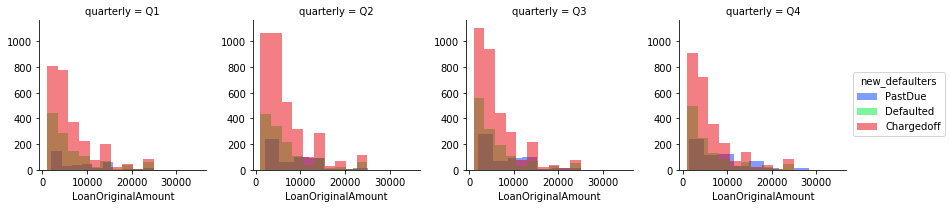

In [11]:
# multivariate plot of LoanOriginalAmount by quarterly, and new_defaulters
def mult_facet_hist(data, col, hue, palette, hist):
    g = sb.FacetGrid(data = data, col = col, hue = hue, palette = palette);
    g = g.map(plt.hist, hist , alpha = 1/2);
    g.add_legend();

mult_facet_hist(prosper_defaulters_df, "quarterly", 'new_defaulters', 'bright', 'LoanOriginalAmount')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the visualization, the histogram is skewed to the right across all the four quarters and across the three defaulter types. This shows that the customers that collected the smaller loans defaulted more than those that collected higher amount loans

### Were there any interesting or surprising interactions between features?

> It is the low-ended customers that defaulted more with their loans than the high-ended customers based on prosper dataset

<a id='Observations01'></a>
## Observations

>**Conclusion**:
>We cannot ascertain that a customer would default on loans collected based on the quarter of the year they took the loan but 
most of the defaulters of loans are those that took lower amount of loans.


<a id='Question2'></a>
## Question 2

<a id='Question02'></a>
### Question
#### Does a credit ratings of a customer also mean he has a high level of trust among his friends and investors?
>To answer this question, the dataset is filtered with regards to creditGrade, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors in Prosper bank. We remove all rows that have NaN values in the CreditGrade column.

>Then, we begin to explore the data using univariate, bivariate and multivariate exploration of the data.

>Finally, we explain what we observed with the explored data.

In [12]:
prosper_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,new_defaulters
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Completed
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Completed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Current
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Current


In [13]:
#Filtering the select columns to perform the analysis
cols = ['ProsperScore', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
prosper_credit_rate_df = prosper_df[cols]

#converting the type of the 'ProsperScore' column' to category
prosper_credit_rate_df["ProsperScore"] = prosper_credit_rate_df["ProsperScore"].astype("category")
prosper_credit_rate_df.info()

#sorting the 'ProsperScore' column to filter out the NaN values in the dataset
options = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 
    
# selecting rows based on options 
prosper_credit_rate_df = prosper_credit_rate_df[prosper_credit_rate_df['ProsperScore'].isin(options)] 
prosper_credit_rate_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
ProsperScore                   84853 non-null category
Recommendations                113937 non-null int64
InvestmentFromFriendsCount     113937 non-null int64
InvestmentFromFriendsAmount    113937 non-null float64
Investors                      113937 non-null int64
dtypes: category(1), float64(1), int64(3)
memory usage: 3.6 MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(83397, 5)

In [14]:
prosper_credit_rate_df.head()

,ProsperScore,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,7.0,0,0,0.0,1
3,9.0,0,0,0.0,158
4,4.0,0,0,0.0,20
5,10.0,0,0,0.0,1
6,2.0,0,0,0.0,1


<a id='Visualization02'></a>
## Visualization

## Univariate Exploration

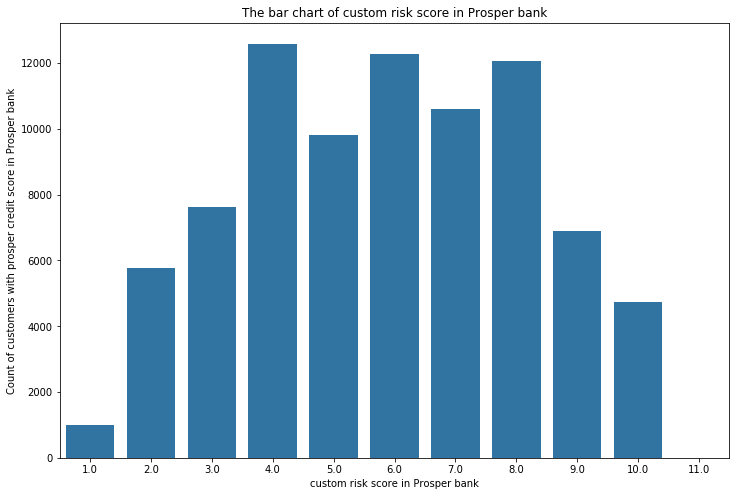

In [15]:
#using the bar_chart function to plot the bar chart
bar_chart_plot('ProsperScore', prosper_credit_rate_df, 'custom risk score in Prosper bank', 
               'Count of customers with prosper credit score in Prosper bank', 'The bar chart of custom risk score in Prosper bank')

>**Conclusion**: From the visualization above,prosper bank majorly avails loans to customers with credit score of 5 and above. With 10 being the best, or lowest risk score and 0 being the worst, or highest risk score respectively. This shows that Propser bank is risk averse.

## Bivariate Exploration

In [16]:
def box_plot(data, xlabel, ylabel, x, y, title):
    plt.figure(figsize=[12, 8]);
    base_color = sb.color_palette()[0]
    sb.boxplot(data=data, x = x, y=y, color=base_color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    


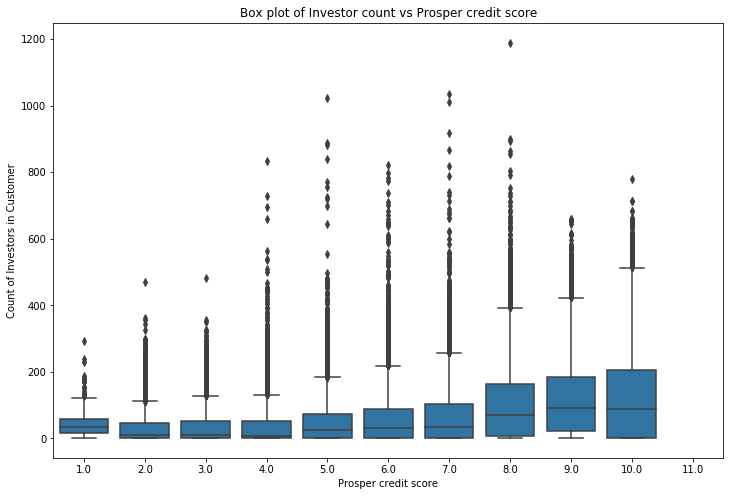

In [17]:
box_plot(prosper_credit_rate_df, 'Prosper credit score', 'Count of Investors in Customer', 
             'ProsperScore', 'Investors', 'Box plot of Investor count vs Prosper credit score')


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the customers with best credit score got enough investors to invest in their enterprise. It seems like the better the credit score of the customer, the more likeoly he gets more investors to invest in his enterprise

## Multivariate Exploration

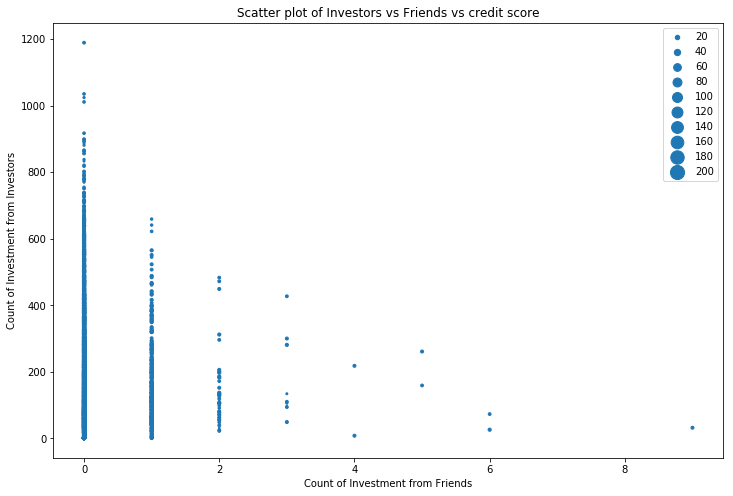

In [18]:
def mult_scatter(data, x, y, s, xlabel, ylabel, title):
    plt.figure(figsize=[12, 8]);
    plt.scatter(data = prosper_credit_rate_df, x = x, y = y, s = s)

    # dummy series for adding legend.
    # This represents the investment from prosper score, s
    sizes = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    base_color = sb.color_palette()[0]
    legend_obj = []
    for s in sizes:
        legend_obj.append(plt.scatter([], [], s = s, color = base_color))
    plt.legend(legend_obj, sizes)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
mult_scatter(prosper_credit_rate_df, 'InvestmentFromFriendsCount', 'Investors', 'ProsperScore', 'Count of Investment from Friends', 'Count of Investment from Investors', 'Scatter plot of Investors vs Friends vs credit score')

<a id='Observations02'></a>
## Observations

>**Conclusion**:
>From the visualizations from this dataset above, it is observed that customers with high credit score are not famous among friends as investors as the relationship is inverse. And that most customers with little or no investments from friends are famous with the Prosper bank as per credit score and count of investors investments. We could also infer that most customer that know that they are not Prosper credit worthy would rather obtain investments from friends.

<a id='Question3'></a>
## Question 3

<a id='Question03'></a>
### Question
#### What are the attributes of customers that perform excellently with regards to loan repayment?

>To answer this question, the dataset is filtered with regards to employment status and the loan status in Prosper bank

>Then, we begin to explore the data using univariate, bivariate and multivariate exploration of the data.

>Finally, we explain what we observed with the explored data.

In [19]:
#sorting the 'LoanStatus' column to filter out the non-essential values in the dataset
options = ['Completed', 'Current', 'FinalPaymentInProgress'] 
    
# selecting rows based on options 
prosper_loan_performers_df = prosper_df[prosper_df['LoanStatus'].isin(options)] 
prosper_loan_performers_df.shape

(94855, 82)

<a id='Visualization03'></a>
## Visualization

## Univariate Exploration

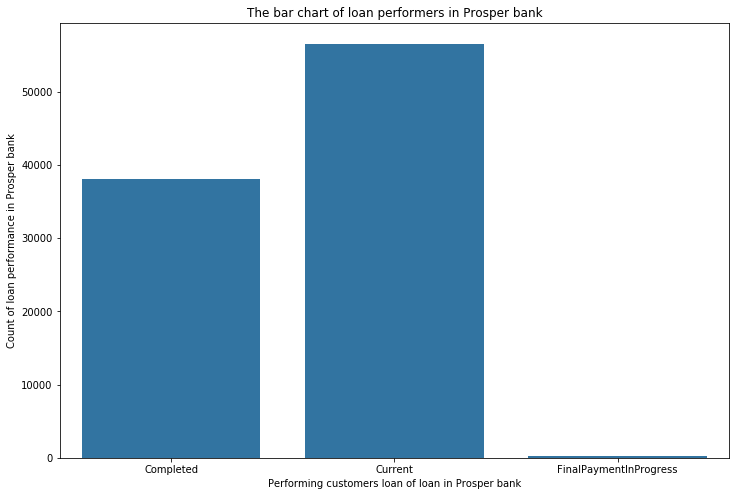

In [20]:
# Bar chart to show the performing loan status
bar_chart_plot('LoanStatus', prosper_loan_performers_df, 'Performing customers loan of loan in Prosper bank', 
               'Count of loan performance in Prosper bank', 'The bar chart of loan performers in Prosper bank' )

>**Conclusion**: From the visualization above, majority of the loan performers have existing loan with the bank while those with the least are those that are making final payments. This shows that the prosper is succeeding with regards to performing loans because the current loan performer exceed those that have completed their loan repayment.

## Bivariate Exploration

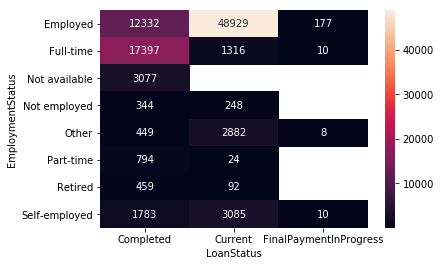

In [21]:
#Using heatmap to show the relationship between the loan Status and the Employment Status
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = prosper_loan_performers_df.groupby(['LoanStatus', 'EmploymentStatus']).size()

#using reset_index to make it a dataframe
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have EmploymentStatus class on rows
ct_counts = ct_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count');
sb.heatmap(ct_counts, annot = True, fmt = '.0f');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the customers with employement status of Employed and Full-time performed most in the completed loans status category while that of Employed performed most in the Current status category. In summary, it is advisable to give laons to the Employed consumers as they seem to have the working capital to pay back among the various employment category.

## Multivariate Exploration

In [22]:
def mult_stripplot(data, x, y, hue, xlabel, ylabel, title):
    plt.figure(figsize = [12, 10]);
    sb.stripplot(data = data, x = x, y = y, hue = hue, alpha = 0.5);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

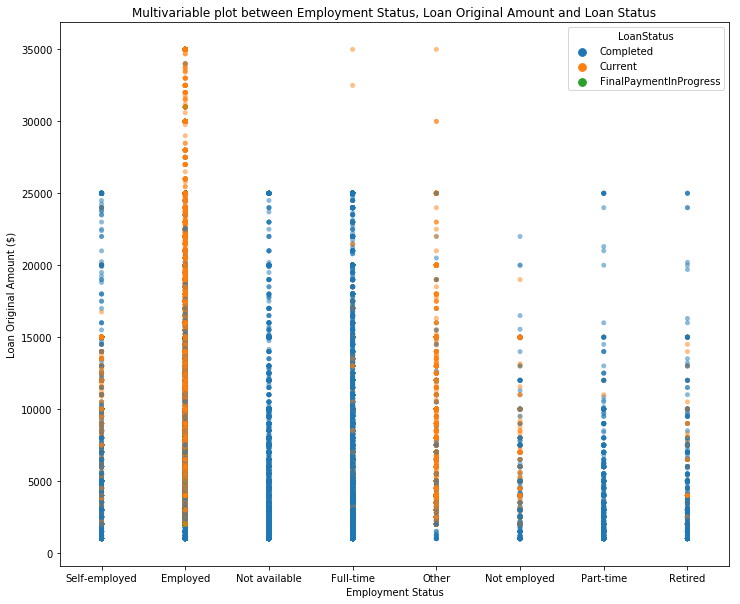

In [23]:
mult_stripplot(prosper_loan_performers_df, 'EmploymentStatus', 'LoanOriginalAmount', 'LoanStatus', 'Employment Status',
               'Loan Original Amount ($)', 'Multivariable plot between Employment Status, Loan Original Amount and Loan Status')

<a id='Observations03'></a>
## Observations

>**Conclusion**:
>From the visualizations from this dataset above, it is observed that Employed customers took the highest loan amounts and are currently operating their loan repayment.Hence, Prosper bank is more interested in giving loans to employed customer for obvious reasons of their salary paying back on the loans. And they least gave loans to Part-time customers compared to the Retired customers. Perhaps the notion is that the Retired customers would repay from their retirement funds compared to Part-time customers that are partially employed and could default from their loans due to business failure.

<a id='Question4'></a>
## Question 4

<a id='Question04'></a>
### Question
#### Do customers that have a high debt to income ratio have a high loan default amount on loans?
>To answer this question, the dataset is filtered with regards to debt to income ratio and the loand amount deliquent in Prosper bank

>Then, we begin to explore the data using univariate, bivariate and multivariate exploration of the data.

>Finally, we explain what we observed with the explored data.

<a id='Visualization04'></a>
## Visualization

## Univariate Exploration

In [24]:
#Creating a new dataset to that does not have nan values for the DebtToIncomeRatio and AmountDelinquent colums respectively
prosper1_df=prosper_df.dropna(subset=['DebtToIncomeRatio','AmountDelinquent'])

#defining the histogram plot function
def hist_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=[12, 8])
    sb.distplot(data, kde=True, hist_kws = {'alpha' : 2/3});
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title); 

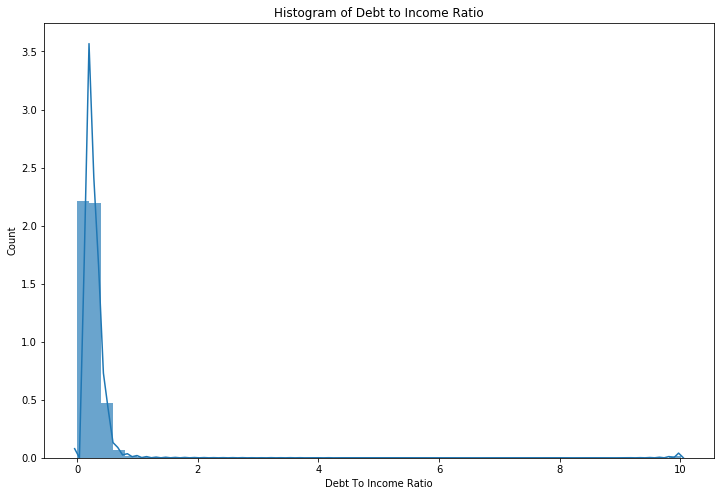

In [25]:
#histogram for DebtToIncomeRatio
hist_plot(prosper1_df['DebtToIncomeRatio'], "Debt To Income Ratio", 'Count', 'Histogram of Debt to Income Ratio')

In [26]:
prosper1_df['DebtToIncomeRatio'].describe()

count    97905.000000
mean         0.276037
std          0.524517
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [27]:
#Filtering customers whose debt to income ratio is 10.01
prosper1 = prosper_df[prosper_df['DebtToIncomeRatio'] == 10.01]
prosper1.count()

ListingKey                             272
ListingNumber                          272
ListingCreationDate                    272
CreditGrade                            226
Term                                   272
LoanStatus                             272
ClosedDate                             247
BorrowerAPR                            272
BorrowerRate                           272
LenderYield                            272
EstimatedEffectiveYield                 46
EstimatedLoss                           46
EstimatedReturn                         46
ProsperRating (numeric)                 46
ProsperRating (Alpha)                   46
ProsperScore                            46
ListingCategory (numeric)              272
BorrowerState                          212
Occupation                             266
EmploymentStatus                       266
EmploymentStatusDuration               229
IsBorrowerHomeowner                    272
CurrentlyInGroup                       272
GroupKey   

>**Conclusion**: From the visualization above, the plot is skewed to the right, prosper does not give loans to customers whose Debt to income ratio exceed 0.5. But there were outliers of 10.1 for 272 customers. This we are going to investigate further with the others biovariate and multivariate plots

## Bivariate Exploration

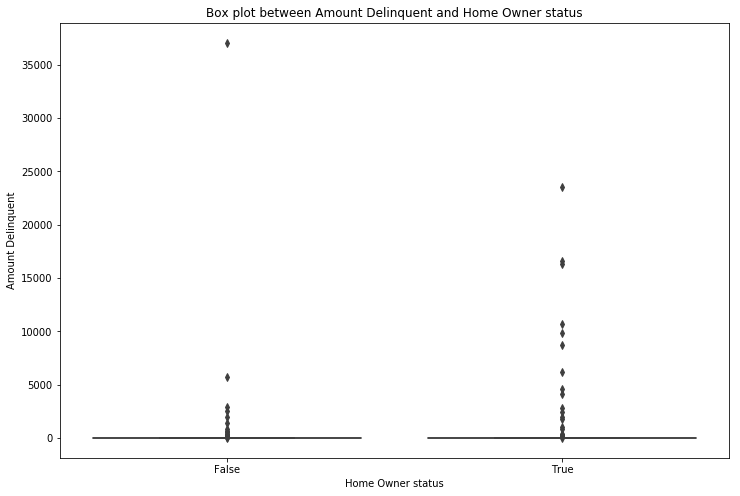

In [28]:
'''
We use the box plot to show the relationship between Amount Delinquent and customers attributes(i.e. IsBorrowerHomeowner) 
for the customers whose Debt to Income ratio is exactly 10.01
'''
box_plot(prosper1, 'Home Owner status', 'Amount Delinquent', 'IsBorrowerHomeowner', 'AmountDelinquent',
         'Box plot between Amount Delinquent and Home Owner status')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed from the plot that despite the customers high debt to income ratio, Prosper bank gave the loans to these customers
because they had zero amount of delinquent loans. Although there are some few outliers shown. Also most of these customers are home owners

## Multivariate Exploration

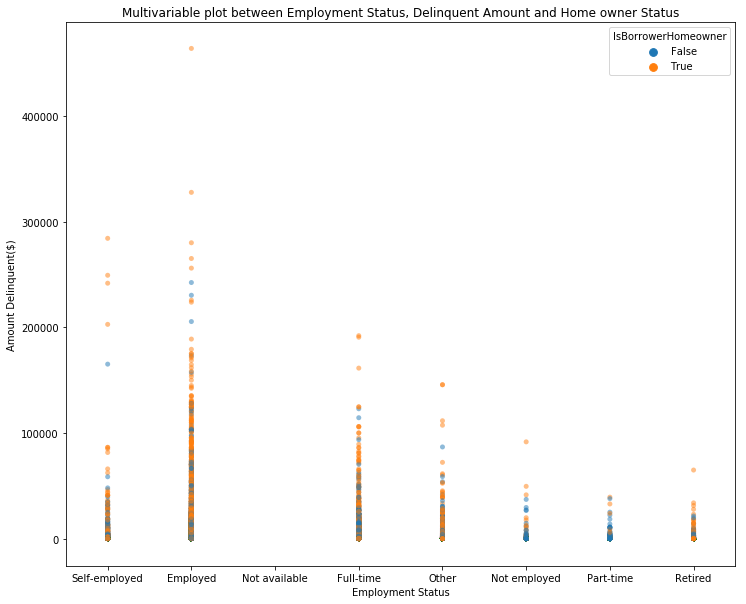

In [29]:
#Using a stripplot to further ascertain the nature or attributes of these customers with 10.01 debt to income ratio
mult_stripplot(prosper_loan_performers_df, 'EmploymentStatus', 'AmountDelinquent', 'IsBorrowerHomeowner', 'Employment Status',
               'Amount Delinquent($)', 'Multivariable plot between Employment Status, Delinquent Amount and Home owner Status')

<a id='Observations04'></a>
## Observations

>**Conclusion**: From the visualization above, the majority of the customers with Debt to income ratio of 10.01 are also home owners. This could be a factor that necessitated prosper bank to give them loans as probably a source of collateral for the loan. Therefore, the higher the debt to income ratio, the less likely a loan is given by prosper bank except for ouliers that had the maximum debt to income ratio of 10.01. And the reasons for this has been explained using the plots above.

<a id='Question5'></a>
## Question 5

<a id='Question05'></a>
### Question
#### What is the trend of loans amount given by Prosper bank over the years?
>To answer this question, the dataset is analyzed with regards to loans amount and the loan period in Prosper bank

>Then, we begin to explore the data using univariate, bivariate and multivariate exploration of the data.

>Finally, we explain what we observed with the explored data.

<a id='Visualization05'></a>
## Visualization

## Univariate Exploration

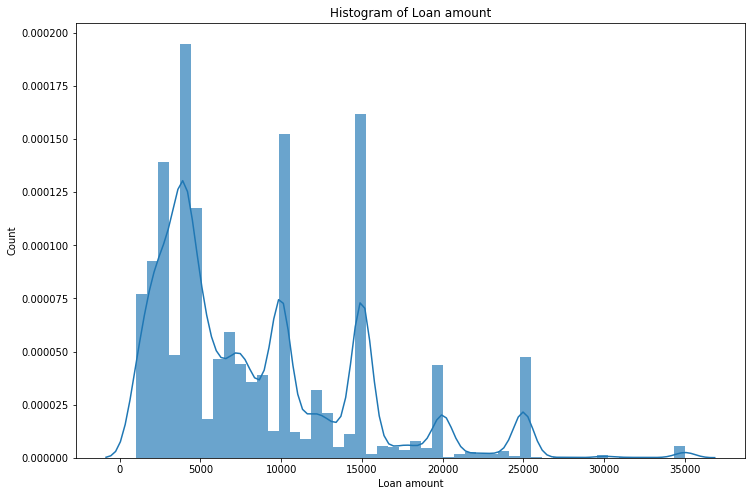

In [30]:
#we create and histogram to view the distribution of the loan amount
hist_plot(prosper_df['LoanOriginalAmount'], "Loan amount", 'Count', 'Histogram of Loan amount')

>**Conclusion**: From the visualization above, yje distribution is right skewed showing that most customers took loans within the range of 0 to 15000 dollars with major spikes at around 5000, 10000 and 15000 dollars respectively

## Bivariate Exploration

In [31]:
# new data frame with split value columns
new = prosper_df["LoanOriginationQuarter"].str.split(" ", n = 1, expand = True)

# making separate column into year column from new data frame
prosper_df["LoanOriginalYear"]= new[1]

prosper_df.head()
prosper_df["LoanOriginalYear"]= prosper_df["LoanOriginalYear"].astype(int)
prosper_df["LoanOriginalYear"].dtype

dtype('int64')

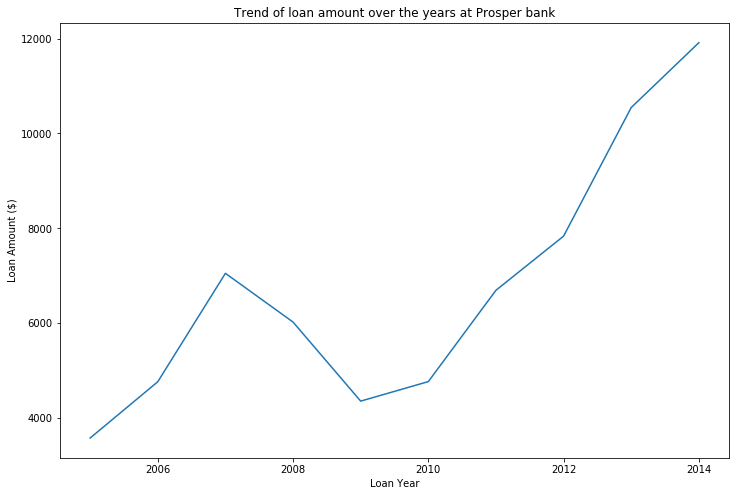

In [32]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(2004, 2014+1, 1)
bin_centers = bin_edges[:-1] + 1

# Cut the bin values into discrete intervals. Returns a Series object.
LoanOriginalYear_binned = pd.cut(prosper_df["LoanOriginalYear"], bin_edges, include_lowest = True)
LoanOriginalYear_binned

# For the points in each bin, we compute the mean and standard error of the mean.
amount_mean = prosper_df['LoanOriginalAmount'].groupby(LoanOriginalYear_binned).mean()
amount_std = prosper_df['LoanOriginalAmount'].groupby(LoanOriginalYear_binned).std()

# Plot the summarized data
plt.figure(figsize=[12, 8])
plt.errorbar(x=bin_centers, y=amount_mean);
# plt.errorbar(x=bin_centers, y=amount_mean, yerr=amount_std)
plt.xlabel('Loan Year')
plt.ylabel('Loan Amount ($)');
plt.title('Trend of loan amount over the years at Prosper bank');



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the loan availment declined from around 2007 till 2009. It is understandable as there was global recession around year 2008. From late 2009, the loan availments started to pick up back even till 2014 as at the prosper data

## Multivariate Exploration


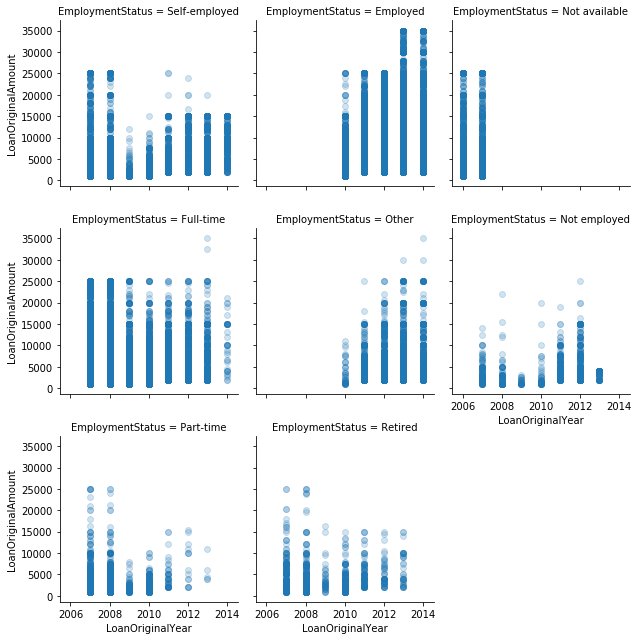

In [33]:
g = sb.FacetGrid(data = prosper_df, col = 'EmploymentStatus', size = 3, col_wrap = 3);
g.map(plt.scatter, 'LoanOriginalYear', 'LoanOriginalAmount', alpha = 1/5);

<a id='Observations05'></a>
## Observations

>**Conclusions** From the visualizations above, the Full-Time and Employed customers of Prosper took the most significant loan over the years. But across board of the employment status, we see that there is a slight decline in the loans in year 2008. This can be attributed to the recession in that year.